In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('../telemetry_logs/data_telemetry_device0_0.csv')

In [10]:
print(data.columns)

Index(['timestamp', 'packet-counter', 'lidar-lite-v3', 'spectrometer-voltage',
       'latitude', 'longitude', 'altitude', 'accelerometer',
       'spectrometer_spectrometer1', 'spectrometer_spectrometer2',
       'spectrometer_spectrometer3', 'spectrometer_spectrometer4',
       'spectrometer_spectrometer5', 'spectrometer_spectrometer6'],
      dtype='object')


In [11]:
data.dropna(subset=['lidar-lite-v3'], inplace=True)

In [12]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [16]:
data.describe()

,timestamp,packet-counter,lidar-lite-v3,spectrometer-voltage,latitude,longitude,altitude,accelerometer,spectrometer_spectrometer1,spectrometer_spectrometer2,spectrometer_spectrometer3,spectrometer_spectrometer4,spectrometer_spectrometer5,spectrometer_spectrometer6
count,6,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2025-03-09 18:11:51.166666752,5.500000,145.166667,3.328333,34.711277,-86.641055,250.0,0.233833,-0.266833,0.221333,4114.833333,6927.500000,4858.500000,4076.166667
min,2025-03-09 18:11:46,1.000000,55.000000,2.350000,34.710922,-86.641471,250.0,-0.500000,-0.935000,-0.522000,1076.000000,3713.000000,836.000000,1006.000000
25%,2025-03-09 18:11:47.249999872,2.250000,87.000000,2.675000,34.711039,-86.641101,250.0,-0.038750,-0.653500,0.012250,1823.750000,6224.750000,2137.750000,2511.250000
50%,2025-03-09 18:11:51.500000,5.500000,143.000000,3.390000,34.711303,-86.641060,250.0,0.292500,-0.487500,0.100000,4363.500000,7304.500000,4174.500000,3607.500000
75%,2025-03-09 18:11:55,8.750000,185.500000,3.467500,34.711467,-86.640909,250.0,0.634250,0.121750,0.550750,4991.500000,7854.000000,7634.750000,4955.000000
max,2025-03-09 18:11:56,10.000000,262.000000,4.910000,34.711658,-86.640769,250.0,0.719000,0.693000,0.966000,8708.000000,9341.000000,9719.000000,8686.000000
std,NaN,3.937004,77.821377,0.921985,0.000291,0.000242,0.0,0.479978,0.625651,0.528937,2855.373070,1933.391192,3620.417034,2696.281470


In [14]:
lidar_data = data[['timestamp', 'packet-counter', 'lidar-lite-v3']]

In [17]:
lidar_data['lidar-lite-v3'].describe()

count      6.000000
mean     145.166667
std       77.821377
min       55.000000
25%       87.000000
50%      143.000000
75%      185.500000
max      262.000000
Name: lidar-lite-v3, dtype: float64

In [21]:
lidar_med_and_mode = {
    'Median': lidar_data['lidar-lite-v3'].median(),
    'Mode': lidar_data['lidar-lite-v3'].mode()
}

medmode = pd.DataFrame(lidar_med_and_mode)
print(medmode)

   Median   Mode
0   143.0   55.0
1   143.0   70.0
2   143.0  138.0
3   143.0  148.0
4   143.0  198.0
5   143.0  262.0


In [22]:
lidar_filtered = lidar_data[(lidar_data['lidar-lite-v3'] > 1.52400 * 100) & (lidar_data['lidar-lite-v3'] < 6.09600 * 100)]

In [23]:
lidar_dataframe = pd.DataFrame(lidar_filtered)
display(lidar_dataframe)

,timestamp,packet-counter,lidar-lite-v3
0,2025-03-09 18:11:46,1.0,262.0
3,2025-03-09 18:11:55,8.0,198.0


Text(0, 0.5, 'Lidar Lite v3 Distance (m)')

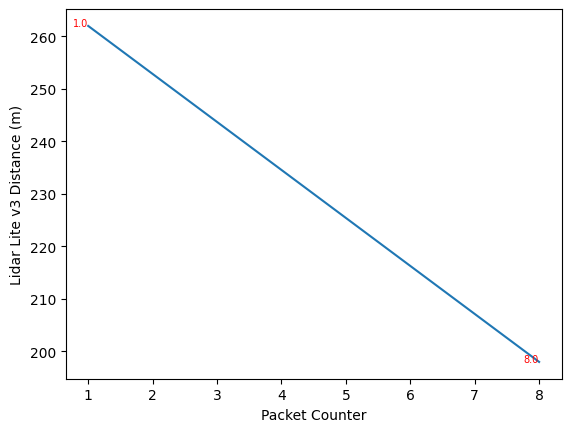

In [24]:
plt.plot(lidar_filtered['packet-counter'], lidar_filtered['lidar-lite-v3'])

for i in range(len(lidar_filtered)):
    plt.text(lidar_filtered['packet-counter'].iloc[i], lidar_filtered['lidar-lite-v3'].iloc[i],
             str(lidar_filtered['packet-counter'].iloc[i]), fontsize=7, color='red', ha='right')

plt.xlabel('Packet Counter')
plt.ylabel('Lidar Lite v3 Distance (m)')


In [1]:
# - - - - - - - - - - - - - - -